Escogí el dataset
"Approval_credit_card", incluye variables como: 
Gender: 1 Hombre / 2 Mujer
Own_car: Una característica binaria que indica si el individuo posee un automóvil.
Own_property: Una característica binaria que indica si el individuo posee una propiedad.
Work_phone: Una función binaria que indica si la persona tiene un teléfono del trabajo.
Phone: Una característica binaria que indica si el individuo tiene un teléfono.
Email:	Una característica binaria que indica si el individuo nos provio de un e-mial
Unemployed:	Característica binaria que indica si el individuo está desempleado.
Num_children: El número de hijos que tiene el individuo.
Num_family: El número total de miembros de la familia.
Account_length: La duración de la cuenta del individuo en un banco o institución financiera. (expresada en meses)
Total_income: El ingreso total del individuo.
Age: La edad del individuo.
Years_employed: El número de años que el individuo ha estado empleado.
Income_type: El tipo de ingreso
Education_type: El nivel educativo del individuo.
Family_status:	The family status of the individual.
Housing_type El tipo de vivienda en la que vive el individuo.
Occupation_type El tipo de ocupación que realiza el individuo.
Target: La variable objetivo para la tarea de clasificación, que indica si el individuo es elegible para una tarjeta de crédito o no. 
------------------------------------------------------
Las variables Binarias mostradas en el dataset tienen como diccionario;  1- Si, 2- No 

trataremos de encontrar la relación entra las variables y el resultado final "approved", "rejected" analizar el peso de cada una de las variables con el resultado final y las correlaciones entre variables.  



In [1]:
#import all the libraries we'll be potentially using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
#create a dataframe with the dataset we choose 


df = pd.read_csv('credit_card_approval.csv')
df['genero'] = df['Gender'].apply(lambda x: 'Male' if x == 0 else 'Woman')
df['credit'] = df['Target'].apply(lambda x: 'Approved' if x == 1 else 'Rejected')
df.drop(columns=['ID'], inplace=True)
df

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,genero,credit
0,1,1,1,1,0,0,0,0,2,15,...,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1,Woman,Approved
1,1,1,1,0,0,0,0,0,2,29,...,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,Woman,Rejected
2,0,0,1,0,1,1,0,0,1,4,...,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,Male,Rejected
3,0,0,1,0,0,0,1,0,1,20,...,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0,Male,Rejected
4,1,1,1,1,1,1,0,0,2,5,...,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0,Woman,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,...,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1,Male,Approved
9705,0,0,1,1,1,0,0,0,2,19,...,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1,Male,Approved
9706,1,1,1,0,0,0,0,0,2,21,...,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1,Woman,Approved
9707,0,0,1,0,1,1,0,0,2,32,...,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1,Male,Approved


In [3]:
### see if the dataframe needs transformation before doing any analysis
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   object 
 14  Education_type   9709 non-null   object 
 15  Family_status    9709 non-null   object 
 16  Housing_type     9709 non-null   object 
 17  Occupation_typ

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132042
std,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [4]:
coef_var_age= (df['Age'].std()/df['Age'].mean())*100
coef_var_age  
#la media es representativa

26.552491798291733

In [5]:
coef_var_ye = (df['Years_employed'].std()/df['Years_employed'].mean())*100
coef_var_ye
#la media no es representativa


111.96016572944995

In [6]:
coef_var_acc = (df['Account_length'].std()/df['Account_length'].mean())*100
coef_var_acc
#la media no es representativa


61.048848743445475

In [7]:
coef_var_ti = (df['Total_income'].std()/df['Total_income'].mean())*100
coef_var_ti
#la media no es representativa


54.7802759595181

In [8]:
coef_var_nc = (df['Num_children'].std()/df['Num_children'].mean())*100
coef_var_nc
#la media no es representativa


181.4125855672131

Empezamos con la primera premisa, hay una clara mayor aplicación a tarjetas de crédito por parte del genero Másculino, sin embargo las mujeres tienen un approval rate mucho mas alto acorde a su proporción

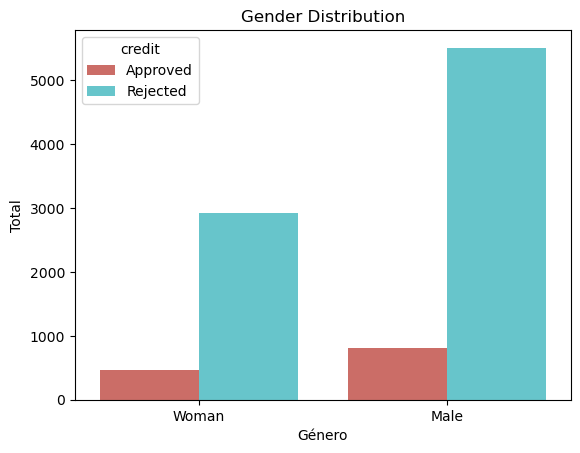

In [9]:
#Gender distribution

sns.countplot(data=df, x='genero', hue="credit", palette='hls')
plt.title('Gender Distribution')
plt.xlabel('Género')
plt.ylabel('Total')
plt.show()


Se analiza la distribución de aplicantes a tarjetas de crédito por Edad.

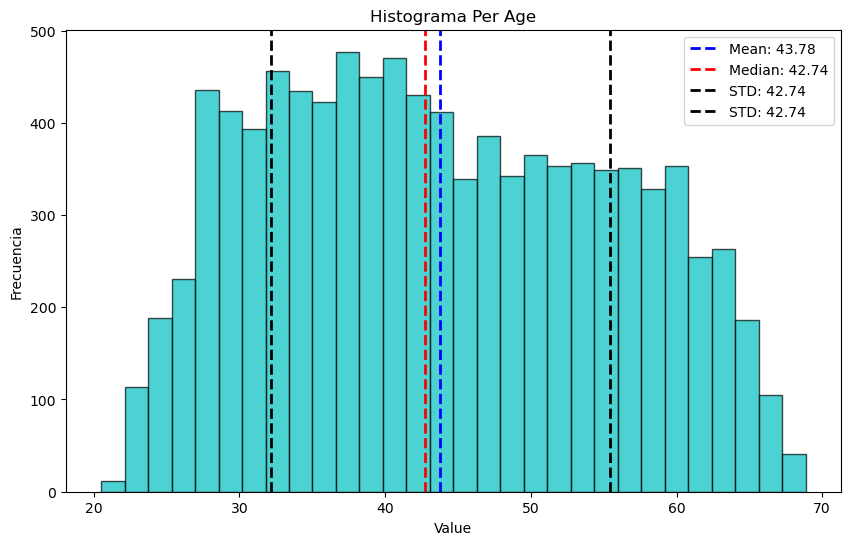

In [10]:
mean_value = df['Age'].mean()
median_value = df['Age'].median()
std_value = df['Age'].std()
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, alpha=0.7, color='c', edgecolor='k')

#Media
plt.axvline(mean_value, color='blue', linestyle='dashed',
            linewidth=2, label=f'Mean: {mean_value:.2f}')
#mediana
plt.axvline(median_value, color='red', linestyle='dashed',
            linewidth=2, label=f'Median: {median_value:.2f}')
#desviación_standard
plt.axvline(mean_value-std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.axvline(mean_value+std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.title('Histograma Per Age')
plt.xlabel('Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Revisando la distribución de edad de los aplicantes al crédito vemos que la mayor cantidad de población registrada está entre los 32 años a los 56 años 


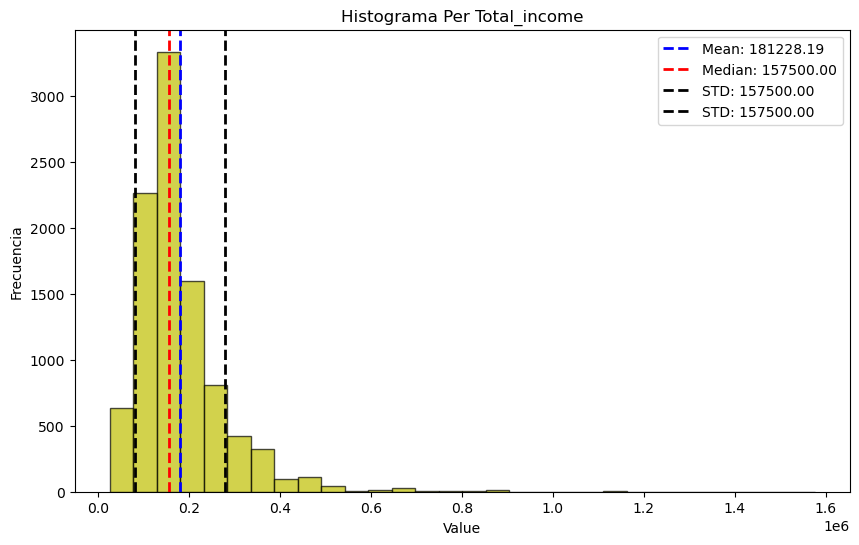

In [11]:
mean_value = df['Total_income'].mean()
median_value = df['Total_income'].median()
std_value = df['Total_income'].std()
plt.figure(figsize=(10, 6))
plt.hist(df['Total_income'], bins=30, alpha=0.7, color='y', edgecolor='k')

#Media
plt.axvline(mean_value, color='blue', linestyle='dashed',
            linewidth=2, label=f'Mean: {mean_value:.2f}')
#mediana
plt.axvline(median_value, color='red', linestyle='dashed',
            linewidth=2, label=f'Median: {median_value:.2f}')
#desviación_standard
plt.axvline(mean_value-std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.axvline(mean_value+std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.title('Histograma Per Total_income')
plt.xlabel('Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


observamos que la media y mediana de total income de todos los aplicantes registrados se encuentran bastante cercanos, por lo que en una primera instancia no pareciera la variable con mas peso para la decisión


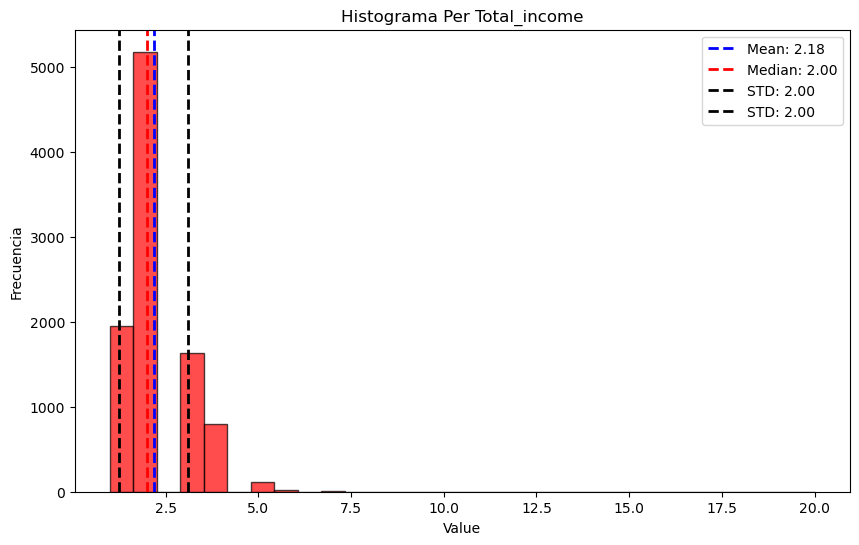

In [12]:
mean_value = df['Num_family'].mean()
median_value = df['Num_family'].median()
std_value = df['Num_family'].std()
plt.figure(figsize=(10, 6))
plt.hist(df['Num_family'], bins=30, alpha=0.7, color='r', edgecolor='k')

#Media
plt.axvline(mean_value, color='blue', linestyle='dashed',
            linewidth=2, label=f'Mean: {mean_value:.2f}')
#mediana
plt.axvline(median_value, color='red', linestyle='dashed',
            linewidth=2, label=f'Median: {median_value:.2f}')
#desviación_standard
plt.axvline(mean_value-std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.axvline(mean_value+std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.title('Histograma Per Total_income')
plt.xlabel('Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Se busca encontrar posibles correlacones entre el genero , la educación y los ingresos al año. se encuentra que las mujeres tienden a tener mejores salarios con menor educación que los hombres, sin embargo los hombres tienden a tener una mayor educación, puede haber una posible correlación entre la aprobación de tarjetas de crédito y el salario.

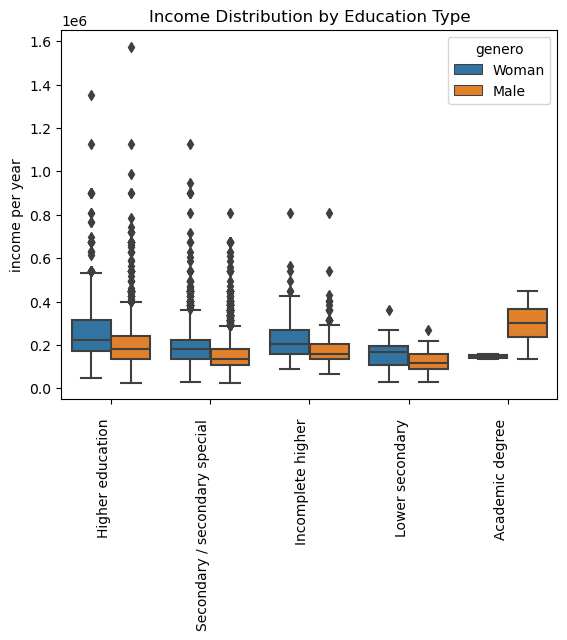

In [13]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='Education_type', y='Total_income',hue='genero')
plt.title('Income Distribution by Education Type')
plt.ylabel('income per year')
plt.xlabel('')
ax.tick_params(axis='x', which='major', pad=10)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()





Se nota una clara correlación entre empleos formales y la aprobación de crédito, los estudiantes parecen no cumplir los requerimientos mínimos de income per year, por lo que +90% de ellos son rechazados.

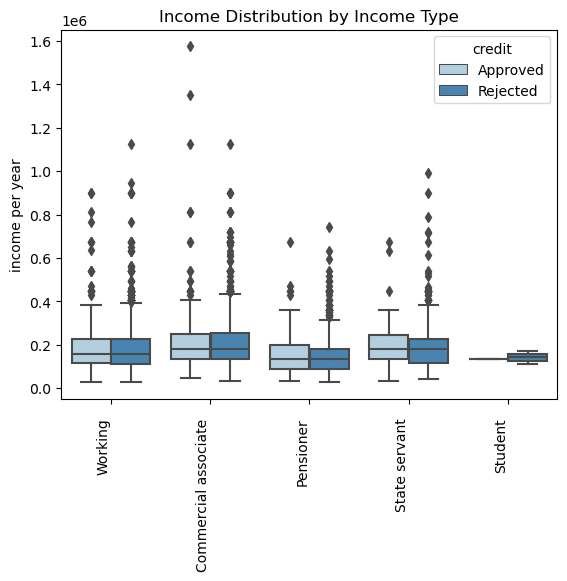

In [14]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='Income_type', y='Total_income',
            hue='credit', palette='Blues')
plt.title('Income Distribution by Income Type')
plt.ylabel('income per year')
plt.xlabel('')
ax.tick_params(axis='x', which='major', pad=10)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


El mayor approval rate registrado se encuentra entre los pensionados y los servidores de estado, tal parece ser que aunque persiven salarios similares a los trabajadores y comerciantes, es un factor positivo frente a nuestra variable objetivo 

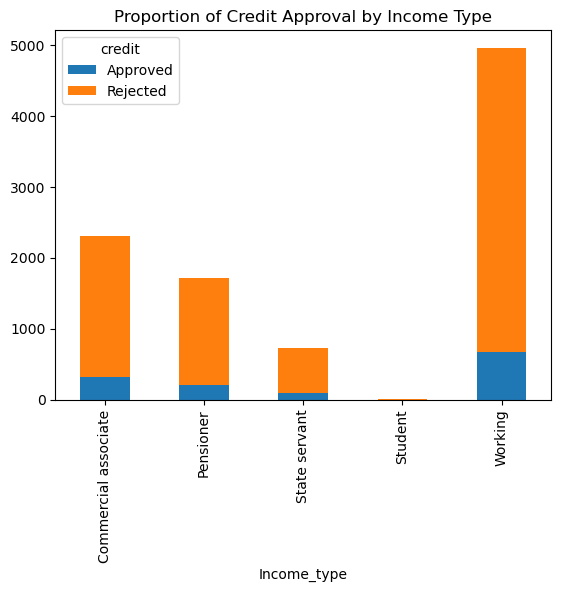

In [15]:
pd.crosstab(df['Income_type'], df['credit']).plot(kind='bar', stacked=True)
plt.title('Proportion of Credit Approval by Income Type')
plt.show()



Se analizan  las variables 'Age', 'Years_employed',
             'Total_income', 'Account_length' y sus posibles corelaciones, la mas clara correlación entre la aprobación de tarjeta de crédito parece ser la edad vs Total income
             se buscara analizar mucho mas de cerca la gráfica, muestra una tendencia marcada a las personas jovenes con ingresos altos son poco rechazados para una tarjeta de crédito 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

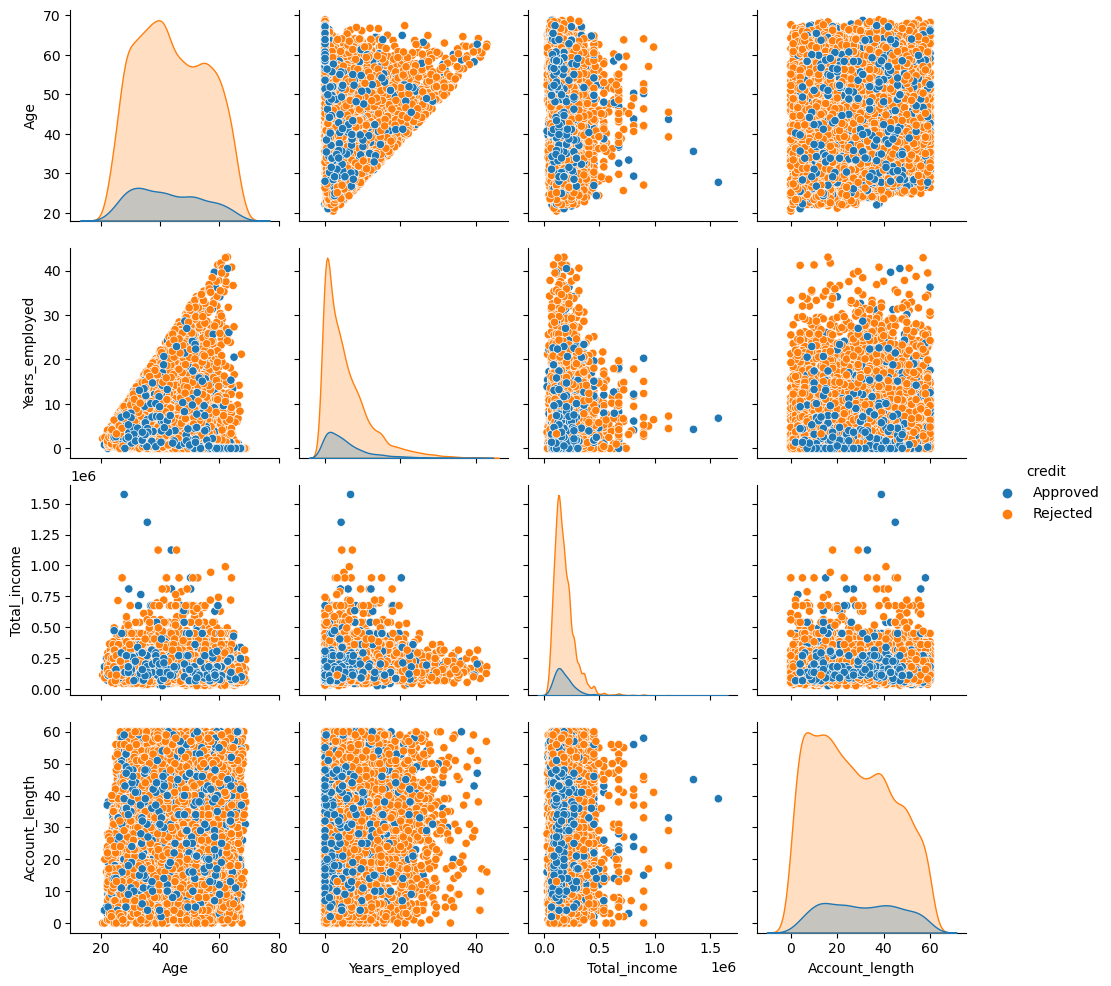

In [16]:
sns.pairplot(df, vars=['Age', 'Years_employed',
             'Total_income', 'Account_length'], hue='credit')
plt.show()


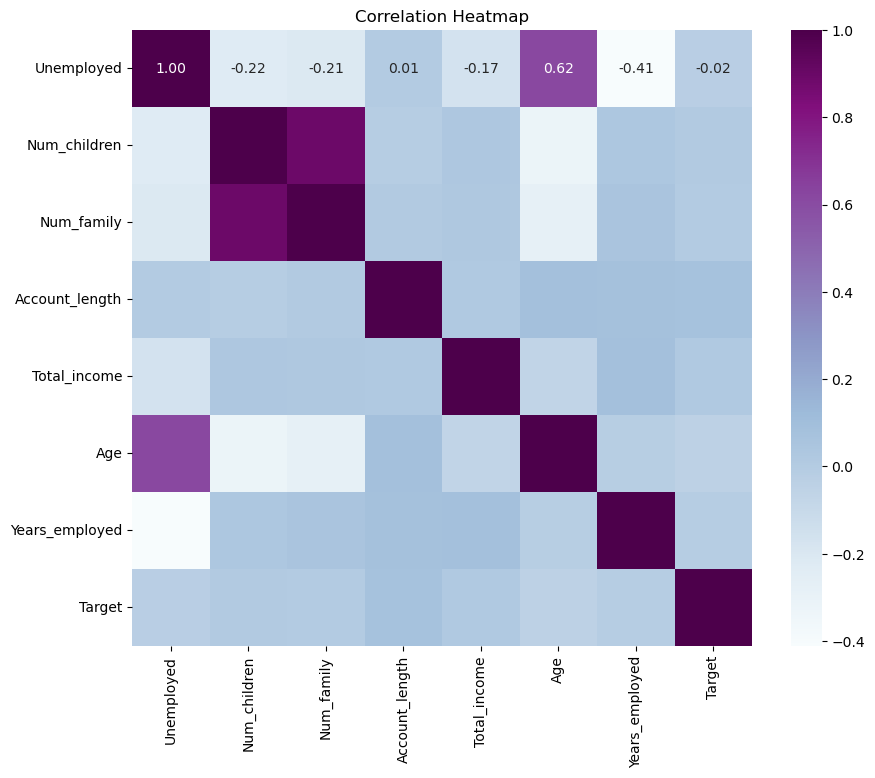

In [17]:
df_subset = df.drop(columns=['Gender','Own_car','Own_property','Work_phone','Phone','Email'])
numeric_cols = df_subset.select_dtypes(include=['number']).columns
corr = df_subset[numeric_cols].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



Con el mapa de calor se busca encontrar las variables con mas peso frente a la variable objetivo "target", Las variables "account_length","total income" y "unemployed" parecen ser variables con un peso significativo

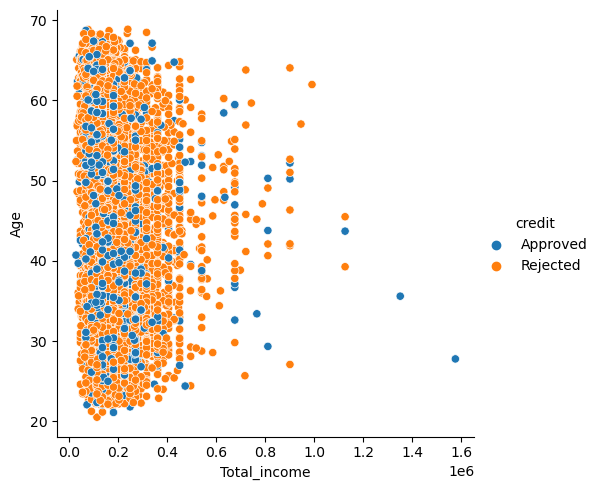

In [19]:
g = sns.relplot(data=df, x='Total_income',y='Age',hue='credit', kind="scatter")

Analizamos la distribución deL Target VS total_income/ Age a primera instancia se puede observar que un "total_income" alto vs edad por debajo de 60 podrían tener cierta correlación con Target

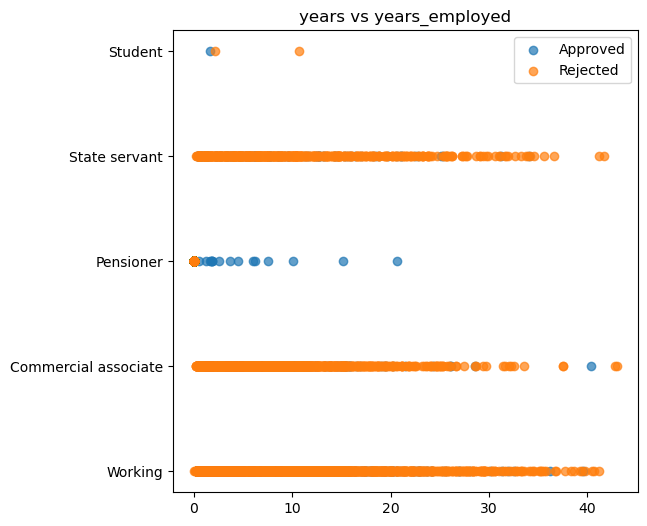

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df[df['credit'] == 'Approved']['Years_employed'],
           df[df['credit'] == 'Approved']['Income_type'],alpha=0.7)
ax.scatter(df[df['credit'] == 'Rejected']['Years_employed'],
           df[df['credit'] == 'Rejected']['Income_type'], alpha=0.7)
ax.set_title('years vs years_employed')
ax.legend(['Approved','Rejected'],loc = 'upper right')


Nuevamente los pensionados parecen tener una correlación con un approval rate positivo

In [29]:
#revisamos los tipos de datos de nuestro data frame para saber si necesitamos hacer una tranformación para implementar nuestro modelo
df.dtypes

Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
Target               int64
genero              object
credit              object
dtype: object

In [30]:
#intentaremos inicialmente un modelo de clasificación tipo Decision_Tree
#Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report


In [43]:
#para todos los valores null se implementaria la mediana, hacemos la transformación de datos
if df.isnull().sum().any():
    df = df.fillna(df.median(numeric_only=True).to_dict())
print(df)

      Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  \
0          1        1             1           1      0      0           0   
1          1        1             1           0      0      0           0   
2          0        0             1           0      1      1           0   
3          0        0             1           0      0      0           1   
4          1        1             1           1      1      1           0   
...      ...      ...           ...         ...    ...    ...         ...   
9704       0        0             0           0      0      0           0   
9705       0        0             1           1      1      0           0   
9706       1        1             1           0      0      0           0   
9707       0        0             1           0      1      1           0   
9708       1        0             1           0      0      0           0   

      Num_children  Num_family  Account_length  ...        Age  \
0        

In [50]:
# Debemos de definir nuestro eje X excluyendo nuestra variable objetivo y eliminando algunas variables categoricas
X = df.drop(columns=['Target', 'credit','genero'])
y = df['Target']

# se divide el conjunto de prueba y entrenamiento, comprobamos los tamaños de cada uno
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#comprobamos que se hayan creado correctamente
print(X)
print(y)

      Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  \
0          1        1             1           1      0      0           0   
1          1        1             1           0      0      0           0   
2          0        0             1           0      1      1           0   
3          0        0             1           0      0      0           1   
4          1        1             1           1      1      1           0   
...      ...      ...           ...         ...    ...    ...         ...   
9704       0        0             0           0      0      0           0   
9705       0        0             1           1      1      0           0   
9706       1        1             1           0      0      0           0   
9707       0        0             1           0      1      1           0   
9708       1        0             1           0      0      0           0   

      Num_children  Num_family  Account_length  Total_income        Age  \


In [51]:
#proseguimos a crear el modelo de Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.7651905252317199
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1659
           1       0.18      0.17      0.18       283

    accuracy                           0.77      1942
   macro avg       0.52      0.52      0.52      1942
weighted avg       0.76      0.77      0.76      1942



Evaluando la primera iteración, el modelo parece no tener una fiabilidad global tan mala %76, sin embargo la precisión para detecar a los aprobados "1" es bastante baja

In [52]:
# Obtendremos el peso de cada una de las variables en el modelo para determinar el resultado:
importances = model.feature_importances_
feature_names = X.columns
print(importances)
print(feature_names)

[0.02034972 0.01977821 0.01284115 0.01648119 0.02375806 0.00817833
 0.00234693 0.01472996 0.02807659 0.15135376 0.12855498 0.2453464
 0.16436265 0.03092815 0.02361355 0.03358035 0.01469767 0.06102234]
Index(['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email',
       'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type'],
      dtype='object')


In [53]:
# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(
    by='Importance', ascending=False)

# Imprimir las importancias de las características
print(feature_importances)


            Feature  Importance
11              Age    0.245346
12   Years_employed    0.164363
9    Account_length    0.151354
10     Total_income    0.128555
17  Occupation_type    0.061022
15    Family_status    0.033580
13      Income_type    0.030928
8        Num_family    0.028077
4             Phone    0.023758
14   Education_type    0.023614
0            Gender    0.020350
1           Own_car    0.019778
3        Work_phone    0.016481
7      Num_children    0.014730
16     Housing_type    0.014698
2      Own_property    0.012841
5             Email    0.008178
6        Unemployed    0.002347


Visualizando las importancias de cada una de las variables podríamos considerar desechar algunas con muy poco peso y poder mejorar la fiabilidad del modelo

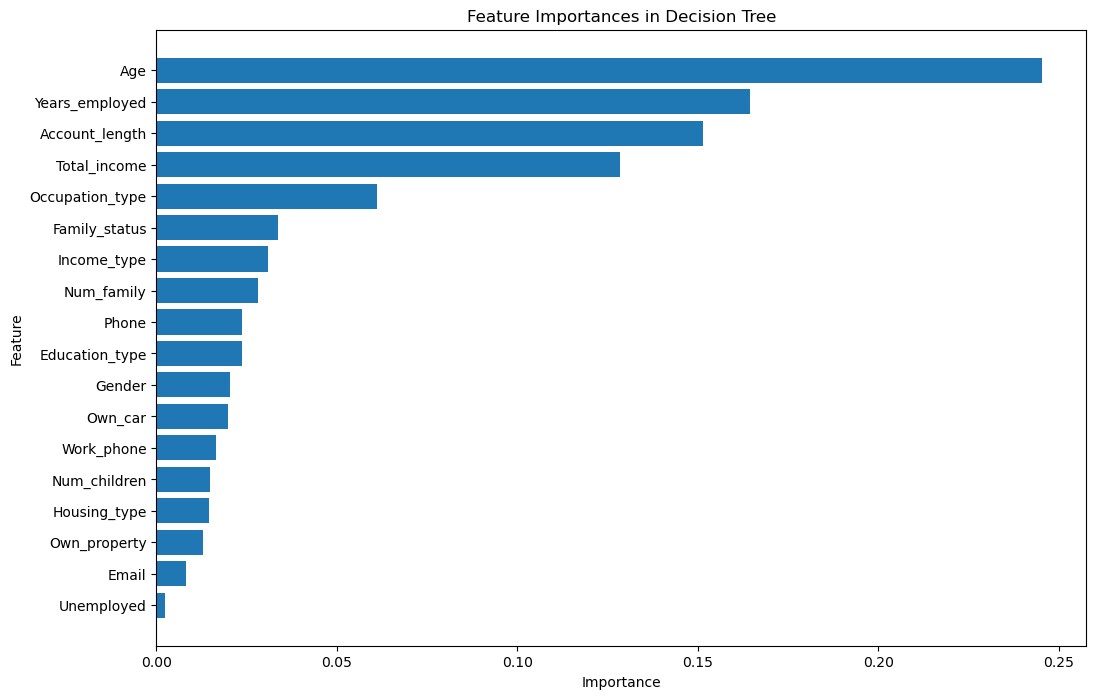

In [54]:
# Visualizar las importancias de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
# Para que las características más importantes aparezcan arriba
plt.gca().invert_yaxis()
plt.show()


Para balancear las variables y encontrar un modelo mas obtimo usaremos SMOTE Y GridSearchCv

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Acorde a Grid_search el modelo de decisión que podría ser mas preciso sería: 

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [61]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [57]:
# Hacer predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.7384140061791967
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1659
           1       0.14      0.16      0.15       283

    accuracy                           0.74      1942
   macro avg       0.50      0.50      0.50      1942
weighted avg       0.75      0.74      0.74      1942



Esta segunda iteración parece tener un peor desempeño frente al anterior 

In [58]:
# Obtener las importancias de las características
importances = best_model.feature_importances_
feature_names = X.columns


In [59]:
# DataFrame para visualizar los pesos
feature_importances = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(
    by='Importance', ascending=False)

print(feature_importances)


            Feature  Importance
13      Income_type    0.152800
15    Family_status    0.118969
14   Education_type    0.115735
17  Occupation_type    0.114676
2      Own_property    0.108771
3        Work_phone    0.080065
4             Phone    0.056676
10     Total_income    0.055892
9    Account_length    0.048838
12   Years_employed    0.043008
11              Age    0.042952
0            Gender    0.031188
1           Own_car    0.017731
16     Housing_type    0.007244
7      Num_children    0.003559
8        Num_family    0.001444
5             Email    0.000452
6        Unemployed    0.000000


volvemos a cancular los pesos de las variables VS la variable objetivo en el nuevo modelo.

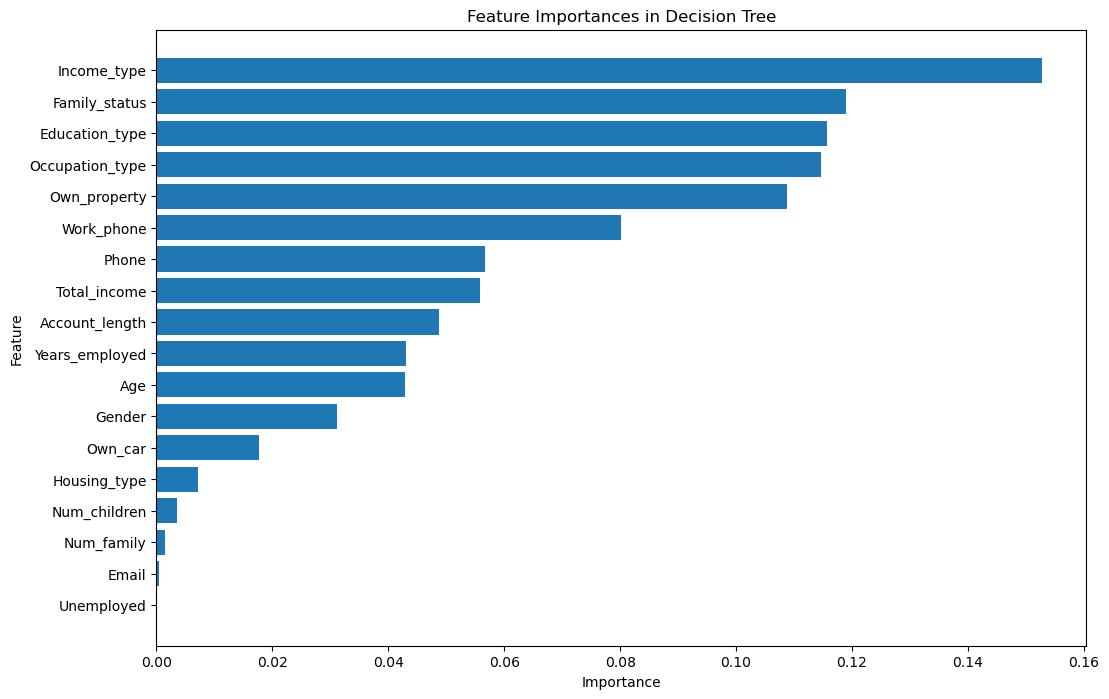

In [60]:
# Visualizar las importancias de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
# Para que las características más importantes aparezcan arriba
plt.gca().invert_yaxis()
plt.show()


Haremos una transformación de datos, modificando algunas columnas a percentiles, para evitar el impacto de los outliers y normalizar sus escalas

In [62]:
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
#  percentiles
numeric_cols = ['Total_income', 'Age', 'Years_employed', 'Account_length']
discretizer = KBinsDiscretizer(
    n_bins=10, encode='ordinal', strategy='quantile')
df[numeric_cols] = discretizer.fit_transform(df[numeric_cols])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(


Eliminamos varibales cuyo peso en las últimas iteraciones han sido bastante bajas, 

In [72]:

X = df.drop(columns=['Target', 'Email', 'Unemployed',
            'Num_family', 'Num_children','credit'])
y = df['Target']


In [73]:
# Dividir el conjunto a entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [75]:
# Crear el modelo de Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Ajustar los hiperparámetros con GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [76]:
# Mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_
best_model


DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

Con el nuevo modelo "idoneo", quitando algunas columnas de poco peso y la transformación a percentiles haremos una tercera prueba del modelo

In [77]:
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.762615859938208
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1686
           1       0.17      0.21      0.19       256

    accuracy                           0.76      1942
   macro avg       0.52      0.53      0.52      1942
weighted avg       0.78      0.76      0.77      1942



Los resultados se asemejan bastante al primer modelo, las transformaciones y eliminación de columnas con poco peso parece no haber tenido gran impacto, analizaremos los pesos de las variables

In [78]:

importances = best_model.feature_importances_
feature_names = X.columns

# df con los pesos 
feature_weight = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(
    by='Importance', ascending=False)
print(feature_importances)


            Feature  Importance
11    Family_status    0.144823
5    Account_length    0.144021
0            Gender    0.113125
14           genero    0.097915
4             Phone    0.088958
7               Age    0.072119
2      Own_property    0.068358
8    Years_employed    0.066527
1           Own_car    0.066173
13  Occupation_type    0.042863
3        Work_phone    0.036526
6      Total_income    0.029546
10   Education_type    0.018712
9       Income_type    0.006644
12     Housing_type    0.003689


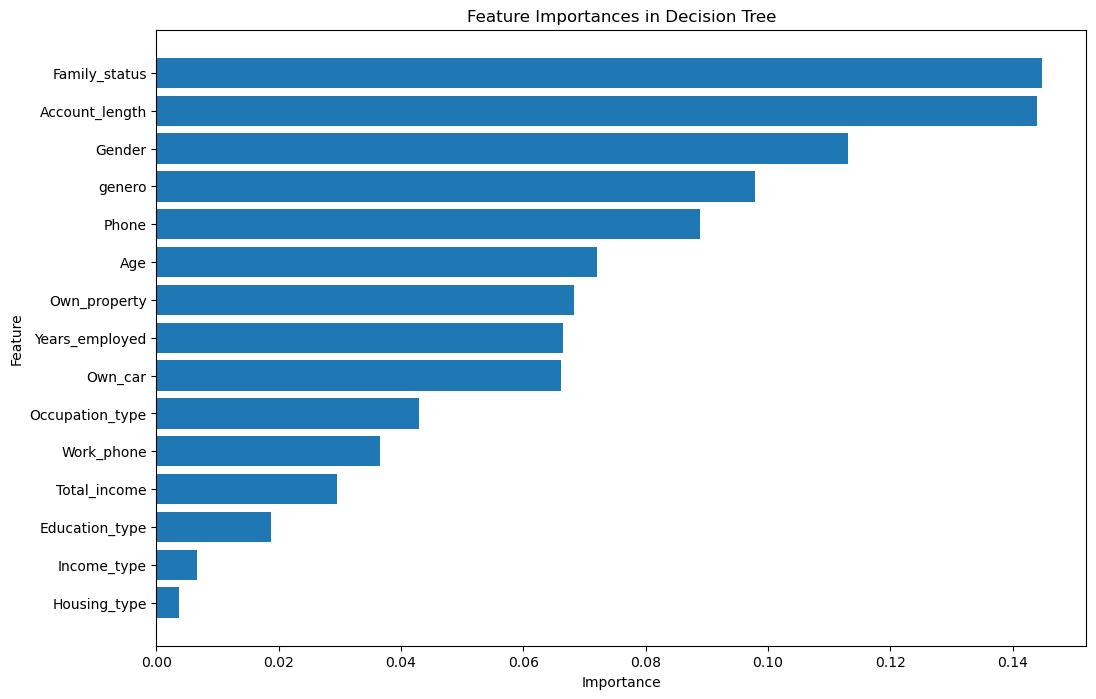

In [79]:
plt.figure(figsize=(12, 8))
plt.barh(feature_weight['Feature'], feature_weight['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
# Para que las características más importantes aparezcan arriba
plt.gca().invert_yaxis()
plt.show()


Ya que los últimos 2 modelos parecen no haber tenido demasiada fiabilidad, optaremos por cambiar de modelo a RandomForest, ya que podría tener mayor sensibilidad al tipo de distribución que tienen las variables de nuestro dataset

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Ajustar los hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=4, scoring='accuracy')
grid_search_rf.fit(X_train_balanced, y_train_balanced)



GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Volvemos a repetir e proceso en el que intentamos buscar el mejor modelo, verificando las variables, sus pesos, etc

Iterando los parametros de

'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
cv=4 

logramos obtener un modelo con una fiabilidad mas aceptable, por el peso del modelo únicamente se incluira la parte éxitosa 

In [104]:
# Mejor modelo encontrado por GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Hacer predicciones
y_pred_rf = best_rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Classification Report:\n{report_rf}')



Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.9603501544799176
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1659
           1       0.94      0.78      0.85       283

    accuracy                           0.96      1942
   macro avg       0.95      0.89      0.91      1942
weighted avg       0.96      0.96      0.96      1942



Al revisar la precisión del modelo podemos constatar que es el mejor modelo hasta el momento, tiene buena precisión tanto para los que deberían ser "aprobados"  como con los "rechazados", las transformaciones de datos y cambiar el tipo de modelo de "decision tree" a  "random forest" parece haber sido la decisión correcta

            Feature  Importance
5    Account_length    0.161260
6      Total_income    0.124801
7               Age    0.119610
8    Years_employed    0.095792
11    Family_status    0.087006
13  Occupation_type    0.085449
14           genero    0.070040
9       Income_type    0.038635
10   Education_type    0.038201
2      Own_property    0.035073
4             Phone    0.031780
1           Own_car    0.031778
0            Gender    0.030491
3        Work_phone    0.026444
12     Housing_type    0.023641


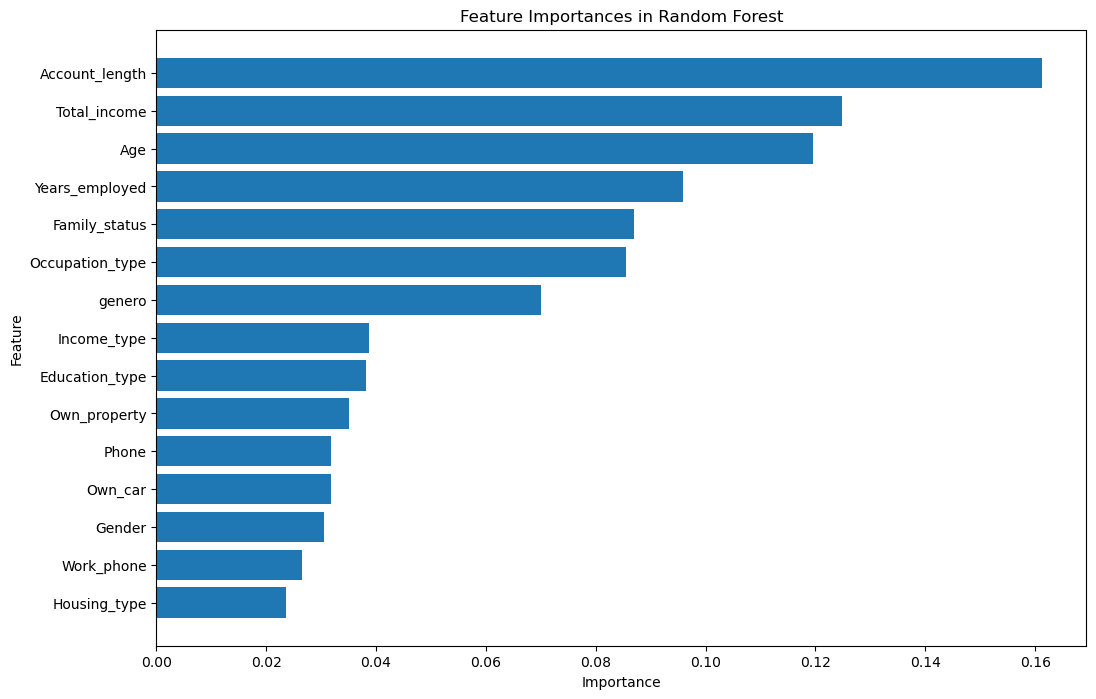

In [106]:
# Obtener las importancias de las características
importances_rf = best_rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar las importancias
feature_importances_rf = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances_rf})
feature_importances_rf = feature_importances_rf.sort_values(
    by='Importance', ascending=False)

# Imprimir las importancias de las características
print(feature_importances_rf)

# Visualizar las importancias de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_rf['Feature'],
         feature_importances_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
# Para que las características más importantes aparezcan arriba
plt.gca().invert_yaxis()
plt.show()


volvemos a revisar el peso de las variables, con un modelo mas robusto, con la transformación de datos a percentiles e iterando

In [103]:
# Primer paso: dividir los datos en entrenamiento+validación y prueba
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Segundo paso: dividir los datos de entrenamiento+validación en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Mostrar las dimensiones de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de validación: {X_val.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')


Tamaño del conjunto de entrenamiento: (5825, 15)
Tamaño del conjunto de validación: (1942, 15)
Tamaño del conjunto de prueba: (1942, 15)


confirmamos el total de valores que se usaran tanto para entrenamiento como para validación y prueba

In [101]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')


# Mostrar resultados de la validación cruzada
print(f'Scores de validación cruzada train: {cv_scores}')
print(f'Media de los scores: {cv_scores.mean()}')
print(f'Desviación estándar de los scores: {cv_scores.std()}')




Scores de validación cruzada train: [0.86695279 0.86437768 0.86695279 0.86437768 0.86609442]
Media de los scores: 0.8657510729613733
Desviación estándar de los scores: 0.0011643484949571132


Revisamos la precisión con validación cruzada de los datos de los 3 grupos

In [100]:
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy')


# Mostrar resultados de la validación cruzada
print(f'Scores de validación cruzada test: {cv_scores}')
print(f'Media de los scores: {cv_scores.mean()}')
print(f'Desviación estándar de los scores: {cv_scores.std()}')


Scores de validación cruzada test: [0.85604113 0.85089974 0.85824742 0.86597938 0.85309278]
Media de los scores: 0.8568520923329711
Desviación estándar de los scores: 0.005205283424858589


In [99]:
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_val, y_val, cv=5, scoring='accuracy')


# Mostrar resultados de la validación cruzada
print(f'Scores de validación cruzada val: {cv_scores}')
print(f'Media de los scores: {cv_scores.mean()}')
print(f'Desviación estándar de los scores: {cv_scores.std()}')


Scores de validación cruzada val: [0.87917738 0.87660668 0.87886598 0.8814433  0.87113402]
Media de los scores: 0.877445472133146
Desviación estándar de los scores: 0.0035082173219812256


Terminando de verificar los conjuntos de datos, de validación, TEST y entrenamiento, constantamos que los resultados obtenidos son bastante similares, por lo que podríamos deducir que tenemos las variables necesarias, un conjunto de datos suficiente para concluir que nuestro modelo tiene un desempeño bastante bueno. y que no estamos cayendo en un modelo con overfiting 

Conclusiones:

El proyecto tenía como objetivo desarrollar un modelo predictivo eficaz para la aprobación de solicitudes de crédito. A lo largo del proceso, se realizaron varias transformaciones y preprocesamiento de los datos, incluyendo el manejo de outliers y el tratamiento  de valores vacíos o nulos. 

se utilizaron varias herramientas de visualización para encontrar posibles patrones entre variables y la variable objetivo.

Se probaron dos modelos de aprendizaje automático: Decision Tree y Random Forest:
Después de evaluar el rendimiento de ambos modelos, se seleccionó el Random Forest debido a su desempeño en la predicción de la variable objetivo ("target") utilizando las variables disponibles, las primeras herramientas de visualización de datos aunque nos podrían haber dado un insight de cuales podrían ser las variables mas importantes para la clasificación, resultaron no ser tan relevantes por si solas para el modelo, aunque tenían un gran rendimiento clasificando los "rechazados",  con los "aprobados" tenía bastantes dificultades.

Usando herramientas de balanceo de variables y algunas transformaciones de datos para aumentar el accuracy del modelo, se logro llegar a un modelo con bastante cercanía a los resultados de la variable objetivo de nuestro dataset inicial.

El modelo final mostró un rendimiento muy cercano al 100%, lo que indica una alta precisión en la clasificación de las solicitudes de crédito. 
